In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from Model_selection_GA import ga_model_selection_mdl
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from Model_selection_GA import evaluate_model_stats

np.random.seed(10)


In [2]:
marketing = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
marketing.dropna(inplace=True)

In [5]:
marketing['Total_amount'] = marketing['MntWines'] + marketing['MntFruits'] + marketing['MntMeatProducts'] + marketing['MntFishProducts'] + marketing['MntSweetProducts'] + marketing['MntGoldProds']

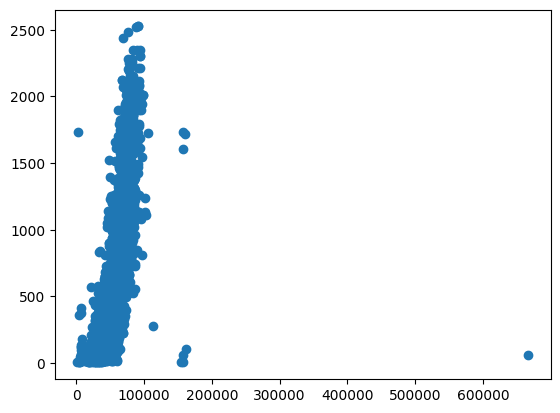

In [6]:
X = np.array(marketing['Income'])
y = np.array(marketing['Total_amount'])
plt.scatter(X, y)

In [7]:
marketing_filter = marketing[marketing['Income'] < marketing['Income'].quantile(.95)]

## Marketing dataset after filtering - all model types

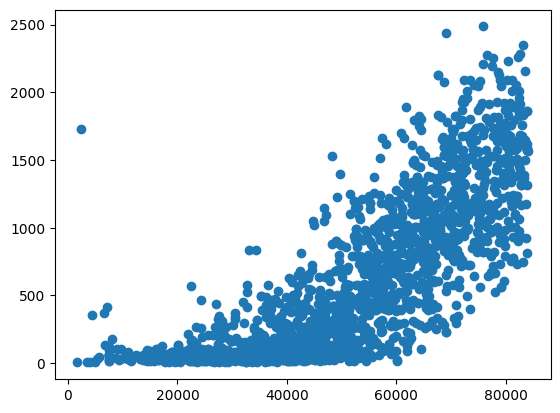

In [18]:
X = np.array(marketing_filter['Income'])
y = np.array(marketing_filter['Total_amount'])
plt.scatter(X, y)

In [9]:
eps = np.std(y - np.median(y))
eps

np.float64(565.8468678947984)

In [35]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type='bic', mutation_prob=0.6, model_types = ["linear", "poly", "tree", "ridge", "rf", "mlp"])
print("Best model:", best_model)
print("MDL:", best_mdl)

Generation 1: best_so_far = {'model_type': 'tree', 'degree': 4, 'n_knots': 5, 'max_depth': 4, 'alpha': 32.60253960155256, 'n_estimators': 30, 'hidden_size': 43}, MDL = 23921.945
Generation 2: best_so_far = {'model_type': 'tree', 'degree': 4, 'n_knots': 5, 'max_depth': 4, 'alpha': 32.60253960155256, 'n_estimators': 30, 'hidden_size': 43}, MDL = 23921.945
Generation 3: best_so_far = {'model_type': 'tree', 'degree': 4, 'n_knots': 5, 'max_depth': 4, 'alpha': 32.60253960155256, 'n_estimators': 30, 'hidden_size': 43}, MDL = 23921.945
Generation 4: best_so_far = {'model_type': 'tree', 'degree': 4, 'n_knots': 5, 'max_depth': 4, 'alpha': 32.60253960155256, 'n_estimators': 30, 'hidden_size': 43}, MDL = 23921.945
Generation 5: best_so_far = {'model_type': 'tree', 'degree': 5, 'n_knots': 8, 'max_depth': 5, 'alpha': 42.36986389205704, 'n_estimators': 20, 'hidden_size': 6}, MDL = 23900.401
Generation 6: best_so_far = {'model_type': 'tree', 'degree': 5, 'n_knots': 8, 'max_depth': 5, 'alpha': 42.36986

In [11]:
stats = evaluate_model_stats(best_model, X.reshape(-1, 1), y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.7628027498343707
MSE: 75946.45075005446
MAE: 192.53842934295795
n_params: 32


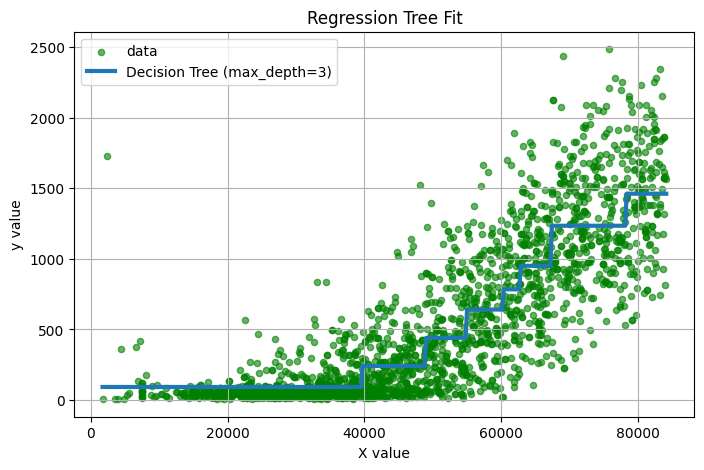

In [10]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# --- Fit regression tree ---
max_depth = 3   # możesz zmienić głębokość
X_arr = np.asarray(X).reshape(-1, 1)

tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
tree.fit(X_arr, y)

# --- Grid for smooth curve ---
X_grid = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
y_grid_tree = tree.predict(X_grid)

# --- Plot ---
plt.figure(figsize=(8, 5))

# scatter
plt.scatter(X, y, s=20, alpha=0.6, label="data", color="green")

# tree prediction line
plt.plot(
    X_grid.ravel(),
    y_grid_tree,
    "-",
    label=f"Decision Tree (max_depth={max_depth})",
    linewidth=3,
)

# labels and grid
plt.xlabel("X value")
plt.ylabel("y value")
plt.title("Regression Tree Fit")
plt.grid(True)

plt.legend()
plt.show()


In [12]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type='cmatrix', mutation_prob=0.6, model_types = ["linear", "poly", "tree", "ridge", "rf", "mlp"] )
print("Best model:", best_model)
print("MDL:", best_mdl)

Generacja 1: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 3, 'max_depth': 6, 'alpha': 0.012258780354394283, 'n_estimators': 45, 'hidden_size': 20}, MDL = 16279.922
Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 3, 'max_depth': 6, 'alpha': 0.012258780354394283, 'n_estimators': 45, 'hidden_size': 20}, MDL = 16279.922
Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 3, 'max_depth': 6, 'alpha': 0.012258780354394283, 'n_estimators': 45, 'hidden_size': 20}, MDL = 16279.922
Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 3, 'max_depth': 6, 'alpha': 0.012258780354394283, 'n_estimators': 45, 'hidden_size': 20}, MDL = 16279.922
Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 3, 'max_depth': 6, 'alpha': 0.012258780354394283, 'n_estimators': 45, 'hidden_size': 20}, MDL = 16279.922
Generacja 6: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 3, 'max_depth': 6, 'alpha'

In [13]:
stats = evaluate_model_stats(best_model, X.reshape(-1, 1), y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.7293550894543863
MSE: 86655.81222022009
MAE: 205.06805035194992
n_params: 6


In [9]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type='cmatrix_with_min1', mutation_prob=0.6, model_types = ["linear", "poly", "tree", "ridge", "rf", "mlp"] )
print("Best model:", best_model)
print("MDL:", best_mdl)

Generation 1: best_so_far = {'model_type': 'tree', 'degree': 7, 'n_knots': 10, 'max_depth': 4, 'alpha': 0.011157277117674835, 'n_estimators': 48, 'hidden_size': 49}, MDL = 10642.240
Generation 2: best_so_far = {'model_type': 'tree', 'degree': 2, 'n_knots': 10, 'max_depth': 3, 'alpha': np.float64(0.7105458794488978), 'n_estimators': 52, 'hidden_size': 37}, MDL = 10595.973
Generation 3: best_so_far = {'model_type': 'tree', 'degree': 2, 'n_knots': 10, 'max_depth': 3, 'alpha': np.float64(0.7105458794488978), 'n_estimators': 52, 'hidden_size': 37}, MDL = 10595.973
Generation 4: best_so_far = {'model_type': 'tree', 'degree': 2, 'n_knots': 10, 'max_depth': 3, 'alpha': np.float64(0.7105458794488978), 'n_estimators': 52, 'hidden_size': 37}, MDL = 10595.973
Generation 5: best_so_far = {'model_type': 'tree', 'degree': 2, 'n_knots': 10, 'max_depth': 3, 'alpha': np.float64(0.7105458794488978), 'n_estimators': 52, 'hidden_size': 37}, MDL = 10595.973
Generation 6: best_so_far = {'model_type': 'tree',

In [12]:
stats = evaluate_model_stats(best_model, X.reshape(-1, 1), y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.7343407588984574
MSE: 85059.4872264615
MAE: 203.7155455070558
n_params: 8


## Marketing - limited model types for BIC

In [39]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type='bic', mutation_prob=0.6, model_types=["linear", "poly", "ridge", "rf"])
print("Best model:", best_model)
print("MDL:", best_mdl)

Generacja 1: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 8, 'max_depth': 3, 'alpha': 0.7352608891959385, 'n_estimators': 13, 'hidden_size': 34}, MDL = 23979.130
Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 8, 'max_depth': 3, 'alpha': 0.7352608891959385, 'n_estimators': 13, 'hidden_size': 34}, MDL = 23979.130
Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 8, 'max_depth': 3, 'alpha': 0.7352608891959385, 'n_estimators': 13, 'hidden_size': 34}, MDL = 23979.130
Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 8, 'max_depth': 3, 'alpha': 0.7352608891959385, 'n_estimators': 13, 'hidden_size': 34}, MDL = 23979.130
Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 8, 'max_depth': 3, 'alpha': 0.7352608891959385, 'n_estimators': 13, 'hidden_size': 34}, MDL = 23979.130
Generacja 6: best_so_far = {'model_type': 'poly', 'degree': 4, 'n_knots': 8, 'max_depth': 3, 'alpha': 0.735260

In [40]:
stats = evaluate_model_stats(best_model, X.reshape(-1, 1), y)
print("Best model:", best_model)
for k, v in stats.items():
    print(f"{k}: {v}")

Najlepszy osobnik: {'model_type': 'poly', 'degree': 4, 'n_knots': 8, 'max_depth': 3, 'alpha': 0.7352608891959385, 'n_estimators': 13, 'hidden_size': 34}
R2: 0.7293550894543863
MSE: 86655.81222022009
MAE: 205.06805035194992
n_params: 6


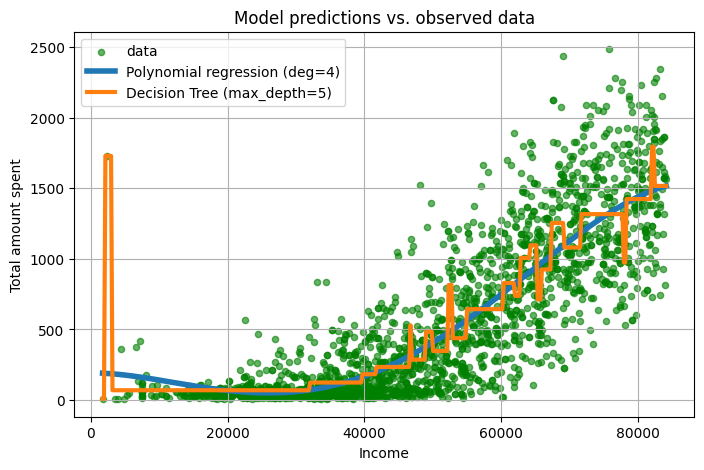

In [22]:
degree_poly = 4
X_arr = np.asarray(X).reshape(-1, 1)

poly = PolynomialFeatures(degree=degree_poly, include_bias=True)
X_poly = poly.fit_transform(X_arr)
lin_poly = LinearRegression().fit(X_poly, y)

max_depth = 5
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
tree.fit(X_arr, y)

X_grid = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
y_grid_tree = tree.predict(X_grid)

X_grid = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)

X_grid_poly = poly.transform(X_grid)
y_grid_poly = lin_poly.predict(X_grid_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=20, alpha=0.6, label="data", color="green")
plt.plot(X_grid.ravel(), y_grid_poly, "-", label=f"Polynomial regression (deg={degree_poly})", linewidth=4)
plt.plot(X_grid.ravel(), y_grid_tree, "-", label=f"Decision Tree (max_depth={max_depth})", linewidth=3)

plt.xlabel("Income")
plt.ylabel("Total amount spent")
plt.title("Model predictions vs. observed data")
plt.grid(True)

plt.legend()
plt.show()


In [13]:
marketing_filter['Age']=2020 - marketing_filter['Year_Birth']

/var/folders/y3/yq4_6mjd0vxdjk2jv9k082q00000gn/T/ipykernel_23918/3873554614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_filter['Age']=2020 - marketing_filter['Year_Birth']


In [14]:
X = marketing_filter[['Income', 'Age', 'NumStorePurchases']].values
y = marketing_filter['Total_amount'].values

# best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type='cmatrix', mutation_prob=0.6, model_types=["linear", "poly", "tree", "ridge", "rf"])
# print("Best model:", best_model)
# print("MDL:", best_mdl)
#


In [13]:
stats = evaluate_model_stats(best_model, X, y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.808815769092538
MSE: 61213.8790254178
MAE: 159.48932295592996
n_params: 32


In [28]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type='bic', mutation_prob=0.6, model_types=["linear", "poly", "tree", "ridge", "rf"])
print("Najlepszy osobnik:", best_model)
print("MDL:", best_mdl)

Generation 1: best_so_far = {'model_type': 'tree', 'degree': 3, 'n_knots': 5, 'max_depth': 6, 'alpha': 0.002154187578449951, 'n_estimators': 79, 'hidden_size': 37}, MDL = 23485.919
Generation 2: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': np.float64(0.08974528662753464), 'n_estimators': 68, 'hidden_size': 48}, MDL = 23446.448
Generation 3: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': np.float64(0.08974528662753464), 'n_estimators': 68, 'hidden_size': 48}, MDL = 23446.448
Generation 4: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': np.float64(0.08974528662753464), 'n_estimators': 68, 'hidden_size': 48}, MDL = 23446.448
Generation 5: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': np.float64(0.08974528662753464), 'n_estimators': 68, 'hidden_size': 48}, MDL = 23446.448
Generation 6: best_so_far = {'model_type': 'tree', 

In [29]:
stats = evaluate_model_stats(best_model, X, y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.808815769092538
MSE: 61213.8790254178
MAE: 159.48932295592996
n_params: 32


In [15]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type='cmatrix_with_min1', mutation_prob=0.6, model_types=["linear", "poly", "tree", "ridge", "rf"])
print("Best model:", best_model)
print("MDL:", best_mdl)

Generation 1: best_so_far = {'model_type': 'tree', 'degree': 5, 'n_knots': 7, 'max_depth': 6, 'alpha': 0.2554134906178843, 'n_estimators': 93, 'hidden_size': 33}, MDL = 8858.674
Generation 2: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': 203.2697658577733, 'n_estimators': 51, 'hidden_size': 12}, MDL = 8813.271
Generation 3: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': 203.2697658577733, 'n_estimators': 51, 'hidden_size': 12}, MDL = 8813.271
Generation 4: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': 203.2697658577733, 'n_estimators': 51, 'hidden_size': 12}, MDL = 8813.271
Generation 5: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': 203.2697658577733, 'n_estimators': 51, 'hidden_size': 12}, MDL = 8813.271
Generation 6: best_so_far = {'model_type': 'tree', 'degree': 6, 'n_knots': 4, 'max_depth': 5, 'alpha': 203.2697658

In [16]:
stats = evaluate_model_stats(best_model, X, y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.808815769092538
MSE: 61213.8790254178
MAE: 159.48932295592996
n_params: 32


## Syntetic 1d dataset

In [24]:
X = np.linspace(-3, 3, 100)
y = 0.5 * X**3 - X + 2 + 0.3 * np.random.randn(len(X))

best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type = "bic", mutation_prob=0.6, model_types=["linear", "poly", "spline", "tree", "ridge", "rf"])
print("Best model:", best_model)
print("MDL:", best_mdl)

Generation 1: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 4, 'max_depth': 4, 'alpha': 0.5329736876026113, 'n_estimators': 15, 'hidden_size': 16}, MDL = -225.021
Generation 2: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 4, 'max_depth': 4, 'alpha': 0.5329736876026113, 'n_estimators': 15, 'hidden_size': 16}, MDL = -225.021
Generation 3: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 4, 'max_depth': 4, 'alpha': 0.5329736876026113, 'n_estimators': 15, 'hidden_size': 16}, MDL = -225.021
Generation 4: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 4, 'max_depth': 4, 'alpha': 0.5329736876026113, 'n_estimators': 15, 'hidden_size': 16}, MDL = -225.021
Generation 5: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 4, 'max_depth': 4, 'alpha': 0.5329736876026113, 'n_estimators': 15, 'hidden_size': 16}, MDL = -225.021
Generation 6: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 4, 'max_depth': 4, 'alpha': 0.53297

In [43]:
stats = evaluate_model_stats(best_model, X.reshape(-1, 1), y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.9933666992350803
MSE: 0.09169945486597073
MAE: 0.24352501376394245
n_params: 5


In [44]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type = "cmatrix", mutation_prob=0.6, model_types=["linear", "poly", "spline", "tree", "ridge", "rf"])
print("Best model:", best_model)
print("MDL:", best_mdl)

Generation 1: best_so_far = {'model_type': 'poly', 'degree': 5, 'n_knots': 6, 'max_depth': 3, 'alpha': 0.005358032801700356, 'n_estimators': 72, 'hidden_size': 22}, MDL = 35.926
Generation 2: best_so_far = {'model_type': 'poly', 'degree': 5, 'n_knots': 6, 'max_depth': 3, 'alpha': 0.005358032801700356, 'n_estimators': 72, 'hidden_size': 22}, MDL = 35.926
Generation 3: best_so_far = {'model_type': 'poly', 'degree': 5, 'n_knots': 6, 'max_depth': 3, 'alpha': 0.005358032801700356, 'n_estimators': 72, 'hidden_size': 22}, MDL = 35.926
Generation 4: best_so_far = {'model_type': 'poly', 'degree': 5, 'n_knots': 6, 'max_depth': 3, 'alpha': 0.005358032801700356, 'n_estimators': 72, 'hidden_size': 22}, MDL = 35.926
Generation 5: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 6, 'max_depth': 3, 'alpha': 0.7829403525075754, 'n_estimators': 29, 'hidden_size': 29}, MDL = 35.424
Generation 6: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 6, 'max_depth': 3, 'alpha': 0.7829403

In [58]:
stats = evaluate_model_stats(best_model, X.reshape(-1, 1), y)

for k, v in stats.items():
    print(f"{k}: {v}")

R2: 0.9941085322526324
MSE: 0.08342527030139733
MAE: 0.2243767904709872
n_params: 5


In [49]:
best_model, best_mdl = ga_model_selection_mdl(X, y, mdl_type = "cmatrix_with_min1", mutation_prob=0.6, model_types=["linear", "poly", "spline", "tree", "ridge", "rf"])
print("Best model:", best_model)
print("MDL:", best_mdl)

Generation 1: best_so_far = {'model_type': 'poly', 'degree': 6, 'n_knots': 6, 'max_depth': 2, 'alpha': 0.015841685390071577, 'n_estimators': 20, 'hidden_size': 22}, MDL = 116.369
Generation 2: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 6, 'max_depth': 1, 'alpha': 12.264500944357279, 'n_estimators': 46, 'hidden_size': 43}, MDL = 110.348
Generation 3: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 6, 'max_depth': 1, 'alpha': 12.264500944357279, 'n_estimators': 46, 'hidden_size': 43}, MDL = 110.348
Generation 4: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 6, 'max_depth': 1, 'alpha': 12.264500944357279, 'n_estimators': 46, 'hidden_size': 43}, MDL = 110.348
Generation 5: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 6, 'max_depth': 1, 'alpha': 12.264500944357279, 'n_estimators': 46, 'hidden_size': 43}, MDL = 110.348
Generation 6: best_so_far = {'model_type': 'poly', 'degree': 3, 'n_knots': 6, 'max_depth': 1, 'alpha': 12.2645009

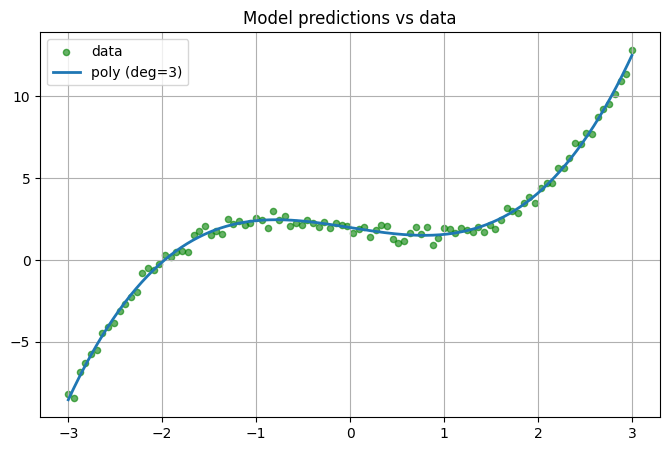

In [25]:
degree_poly = 3

X_arr = np.asarray(X).reshape(-1, 1)

poly = PolynomialFeatures(degree=degree_poly, include_bias=True)
X_poly = poly.fit_transform(X_arr)
lin_poly = LinearRegression().fit(X_poly, y)

X_grid = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)

X_grid_poly = poly.transform(X_grid)
y_grid_poly = lin_poly.predict(X_grid_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=20, alpha=0.6, label="data", color="green")
plt.plot(X_grid.ravel(), y_grid_poly, "-", label=f"poly (deg={degree_poly})", linewidth=2)


plt.title("Model predictions vs data")
plt.grid(True)
plt.legend()
plt.show()


## Syntetic 5D Sphere Dataset - limited model types

In [60]:
def make_sphere_data(n_samples=1000, dim=5, noise=0.0):
    X = np.random.uniform(-5, 5, size=(n_samples, dim))
    y_true = np.sum(X**2, axis=1)
    y = y_true + noise * np.random.randn(n_samples)
    return X, y

X, y = make_sphere_data(n_samples=1000, dim=5, noise=0.3)

In [62]:
best_bic, best_mdl_bic = ga_model_selection_mdl(
    X, y,
    generations=5,
    mdl_type="bic",
)

best_c, best_mdl_c = ga_model_selection_mdl(
    X, y,
    generations=5,
    mdl_type="cmatrix",
)

print("BIC best:", best_bic, "MDL_BIC:", best_mdl_bic)
print("Cmatrix best:", best_c, "MDL_C:", best_mdl_c)

/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 1: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 1, 'alpha': 0.019746026076518864, 'n_estimators': 64, 'hidden_size': 11}, MDL = -2199.284


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 1, 'alpha': 0.019746026076518864, 'n_estimators': 64, 'hidden_size': 11}, MDL = -2199.284


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 1, 'alpha': 0.019746026076518864, 'n_estimators': 64, 'hidden_size': 11}, MDL = -2199.284


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 1, 'alpha': 0.019746026076518864, 'n_estimators': 64, 'hidden_size': 11}, MDL = -2199.284


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 1, 'alpha': 0.019746026076518864, 'n_estimators': 64, 'hidden_size': 11}, MDL = -2199.284


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 1: best_so_far = {'model_type': 'poly', 'degree': 5, 'n_knots': 5, 'max_depth': 6, 'alpha': 13.387179708766633, 'n_estimators': 32, 'hidden_size': 17}, MDL = 280.218


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 7, 'n_knots': 4, 'max_depth': 5, 'alpha': 153.5839297043874, 'n_estimators': 32, 'hidden_size': 34}, MDL = 146.005


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.003160870016201844, 'n_estimators': 89, 'hidden_size': 33}, MDL = 23.151


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.003160870016201844, 'n_estimators': 89, 'hidden_size': 33}, MDL = 23.151


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.003160870016201844, 'n_estimators': 89, 'hidden_size': 33}, MDL = 23.151
BIC best: {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 1, 'alpha': 0.019746026076518864, 'n_estimators': 64, 'hidden_size': 11} MDL_BIC: -2199.2840710510154
Cmatrix best: {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.003160870016201844, 'n_estimators': 89, 'hidden_size': 33} MDL_C: 23.15095356553125


In [63]:
def rastrigin(X, A=10.0):
    X = np.asarray(X)
    return A * X.shape[1] + np.sum(X**2 - A * np.cos(2 * np.pi * X), axis=1)

def make_rastrigin_data(n_samples=1000, dim=5, noise=0.0):
    X = np.random.uniform(-5.12, 5.12, size=(n_samples, dim))
    y_true = rastrigin(X)
    y = y_true + noise * np.random.randn(n_samples)
    return X, y


In [64]:
X, y = make_rastrigin_data(n_samples=2000, dim=5, noise=1.0)
best_bic, _ = ga_model_selection_mdl(X, y, mdl_type="bic", generations=5, mutation_prob=0.6)
best_c, _ = ga_model_selection_mdl(X, y, mdl_type="cmatrix", generations=5, mutation_prob=0.6)


print("BIC best:", best_bic, "MDL_BIC:", best_mdl_bic)
print("Cmatrix best:", best_c, "MDL_C:", best_mdl_c)

/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Generacja 1: best_so_far = {'model_type': 'spline', 'degree': 4, 'n_knots': 3, 'max_depth': 5, 'alpha': 2.0117735866122097, 'n_estimators': 44, 'hidden_size': 31}, MDL = 11329.536
Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 6: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 7: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 8: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 9: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 10: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 11: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 12: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 13: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 14: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 15: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 16: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 17: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 18: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656
Generacja 19: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.

/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 20: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 1: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 6: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 7: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 8: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 9: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 10: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 11: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 12: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_percept

Generacja 13: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 14: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 15: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 16: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 17: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 18: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
Generacja 19: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 20: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5}, MDL = 5082.579
BIC best: {'model_type': 'poly', 'degree': 2, 'n_knots': 7, 'max_depth': 2, 'alpha': 0.2802144302863609, 'n_estimators': 67, 'hidden_size': 27} MDL_BIC: -2199.2840710510154
Cmatrix best: {'model_type': 'poly', 'degree': 8, 'n_knots': 7, 'max_depth': 5, 'alpha': 100.27956816659847, 'n_estimators': 71, 'hidden_size': 5} MDL_C: 23.15095356553125


In [65]:
best_bic, _ = ga_model_selection_mdl(X, y, mdl_type="bic", generations=5, mutation_prob=0.6)
best_c, _ = ga_model_selection_mdl(X, y, mdl_type="cmatrix", generations=5, mutation_prob=0.6)


print("BIC best:", best_bic, "MDL_BIC:", best_mdl_bic)
print("Cmatrix best:", best_c, "MDL_C:", best_mdl_c)

Generacja 1: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 9, 'max_depth': 2, 'alpha': 0.1073638250962387, 'n_estimators': 100, 'hidden_size': 43}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 9, 'max_depth': 2, 'alpha': 0.1073638250962387, 'n_estimators': 100, 'hidden_size': 43}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 9, 'max_depth': 2, 'alpha': 0.1073638250962387, 'n_estimators': 100, 'hidden_size': 43}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 9, 'max_depth': 2, 'alpha': 0.1073638250962387, 'n_estimators': 100, 'hidden_size': 43}, MDL = 11320.656


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 2, 'n_knots': 9, 'max_depth': 2, 'alpha': 0.1073638250962387, 'n_estimators': 100, 'hidden_size': 43}, MDL = 11320.656
Generacja 1: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 4, 'max_depth': 3, 'alpha': 8.228172835420459, 'n_estimators': 29, 'hidden_size': 32}, MDL = 5082.579
Generacja 2: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 4, 'max_depth': 3, 'alpha': 8.228172835420459, 'n_estimators': 29, 'hidden_size': 32}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 3: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 4, 'max_depth': 3, 'alpha': 8.228172835420459, 'n_estimators': 29, 'hidden_size': 32}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 4: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 4, 'max_depth': 3, 'alpha': 8.228172835420459, 'n_estimators': 29, 'hidden_size': 32}, MDL = 5082.579


/Users/marcin/PycharmProjects/AIgorithmic_information_project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Generacja 5: best_so_far = {'model_type': 'poly', 'degree': 8, 'n_knots': 4, 'max_depth': 3, 'alpha': 8.228172835420459, 'n_estimators': 29, 'hidden_size': 32}, MDL = 5082.579
BIC best: {'model_type': 'poly', 'degree': 2, 'n_knots': 9, 'max_depth': 2, 'alpha': 0.1073638250962387, 'n_estimators': 100, 'hidden_size': 43} MDL_BIC: -2199.2840710510154
Cmatrix best: {'model_type': 'poly', 'degree': 8, 'n_knots': 4, 'max_depth': 3, 'alpha': 8.228172835420459, 'n_estimators': 29, 'hidden_size': 32} MDL_C: 23.15095356553125


In [68]:
stats = evaluate_model_stats(best_c, X, y)

for k, v in stats.items():
    print(f"{k}: {v}")

ValueError: Found input variables with inconsistent numbers of samples: [10000, 2000]